In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                           "Roboto-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/roboto/static/"
                         "Roboto-Medium.ttf?raw=true"))

from scipy import stats
import math

In [11]:
# URL = "https://github.com/andrewRowlinson/mplsoccer-assets/blob/main/fdj_cropped.png?raw=true"
# fdj_cropped = Image.open(urlopen(URL))
df = pd.read_csv('marukawa.csv')
df

,Goal,Assist,Tackle,Intercept,Clearance,Shot_on,Shot_off,Pass_Success,Pass_Fail,Cross,Offside,Dribble,Rating
0,1,0,0,0,0,1,0,38,17,1,0,1,7.10
1,0,1,0,1,0,0,0,27,10,0,0,4,6.42
2,0,0,0,1,0,1,0,30,7,0,0,0,6.20
3,0,0,3,1,0,2,1,49,12,0,0,0,6.03
4,1,0,0,0,0,2,0,14,2,0,0,2,7.31
5,1,0,0,2,0,2,0,33,12,0,0,1,7.13
6,0,0,0,1,0,2,2,27,4,0,0,3,6.17
7,0,0,1,0,0,0,1,24,5,0,0,0,6.08
8,0,0,0,1,0,1,0,11,4,1,0,1,6.10
9,1,1,0,1,0,3,2,37,7,2,1,2,7.60


In [12]:
mk = df.sum(axis=0)
mk = mk.to_frame().T
mk['Player']="Marukawa"
mk

,Goal,Assist,Tackle,Intercept,Clearance,Shot_on,Shot_off,Pass_Success,Pass_Fail,Cross,Offside,Dribble,Rating,Player
0,17.0,10.0,35.0,53.0,2.0,35.0,16.0,891.0,301.0,8.0,12.0,34.0,218.09,Marukawa


In [23]:
goal_percent = (mk['Goal']/mk['Shot_on']) * 100
shoton_acc = (mk['Shot_on']/(mk['Shot_on'] + mk['Shot_off'])) * 100
shotoff_acc = (mk['Shot_off']/(mk['Shot_on'] + mk['Shot_off'])) * 100
pass_acc = (891 / (891+301)) * 100
passfail_acc = (mk['Pass_Fail'] / (mk['Pass_Fail']+mk['Pass_Success'])) * 100
rating = (mk['Rating'] / len(df)) * 10

print("Goal Percent = ",goal_percent)
print("shoton_acc = ",shoton_acc)
print("shotoff_acc",shotoff_acc)
print("pass_acc",pass_acc)
print("pass fail acc",passfail_acc)
print("rating",rating)

Goal Percent =  0    48.571429
dtype: float64
shoton_acc =  0    68.627451
dtype: float64
shotoff_acc 0    31.372549
dtype: float64
pass_acc 74.74832214765101
pass fail acc 0    25.251678
dtype: float64
rating 0    68.153125
Name: Rating, dtype: float64


In [56]:
URL = "https://img0.aiscore.com/football/player/f675f767167a43eb09106af003951dad.png!w250"
# URL = "https://img.a.transfermarkt.technology/portrait/header/649447-1639463613.jpg?lm=1"
fdj_cropped = Image.open(urlopen(URL))

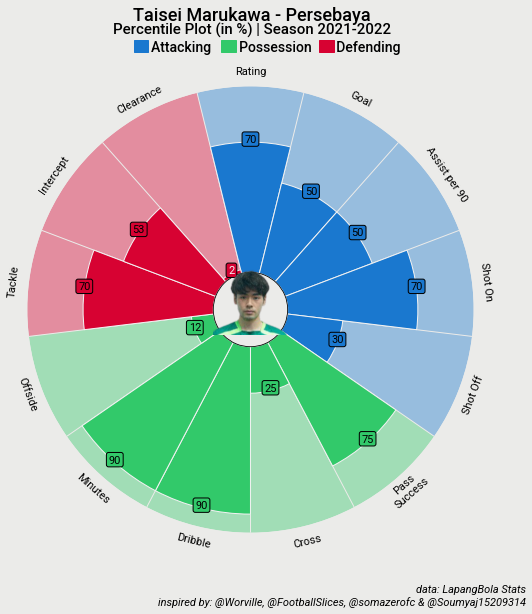

In [73]:
# parameter list
params = [
    "Rating","Goal", "Assist per 90", "Shot On","Shot Off",
    "Pass\nSuccess", "Cross", "Dribble", "Minutes", "Offside", 
    "Tackle", "Intercept", "Clearance"
]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    70, 50, 50, 70, 30,
    75, 25, 90, 90, 12, 
    70, 53, 2
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#32c96a"] * 5 + ["#D70232"] * 3
text_colors = ["#000000"] * 12 + ["#F2F2F2"] * 1

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Taisei Marukawa - Persebaya", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Plot (in %) | Season 2021-2022",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: LapangBola Stats"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=11,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#32c96a",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdj_cropped, fig, left=0.4478, bottom=0.4515, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()

# Ciro Alves

In [59]:
URLS = "https://img0.aiscore.com/football/player/f0698a53a35dd3e0361c49a2a262ae7c.png!w250"
# URL = "https://img.a.transfermarkt.technology/portrait/header/649447-1639463613.jpg?lm=1"
fdjs_cropped = Image.open(urlopen(URLS))

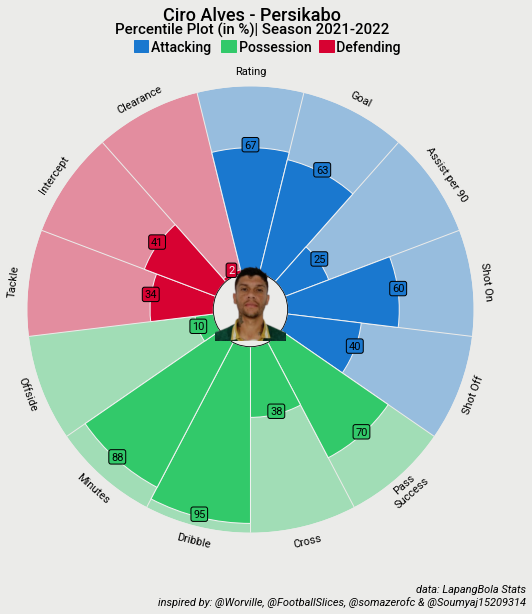

In [72]:
# parameter list
params = [
    "Rating","Goal", "Assist per 90", "Shot On","Shot Off",
    "Pass\nSuccess", "Cross", "Dribble", "Minutes", "Offside", 
    "Tackle", "Intercept", "Clearance"
]

# value list
# The values are taken from the excellent fbref website (supplied by StatsBomb)
values = [
    67, 63, 25, 60, 40,
    70, 38, 95, 88, 10, 
    34, 41, 2
]

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#32c96a"] * 5 + ["#D70232"] * 3
text_colors = ["#000000"] * 12 + ["#F2F2F2"] * 1

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        fontproperties=font_normal.prop, zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Ciro Alves - Persikabo", size=18,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile Plot (in %)| Season 2021-2022",
    size=15,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add credits
CREDIT_1 = "data: LapangBola Stats"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=11,
    fontproperties=font_italic.prop, color="#000000",
    ha="right"
)

# add text
fig.text(
    0.34, 0.925, "Attacking        Possession       Defending", size=14,
    fontproperties=font_bold.prop, color="#000000"
)

# add rectangles
fig.patches.extend([
    plt.Rectangle(
        (0.31, 0.9225), 0.025, 0.021, fill=True, color="#1a78cf",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.462, 0.9225), 0.025, 0.021, fill=True, color="#32c96a",
        transform=fig.transFigure, figure=fig
    ),
    plt.Rectangle(
        (0.632, 0.9225), 0.025, 0.021, fill=True, color="#d70232",
        transform=fig.transFigure, figure=fig
    ),
])

# add image
ax_image = add_image(
    fdjs_cropped, fig, left=0.4478, bottom=0.4515, width=0.13, height=0.127
)   # these values might differ when you are plotting

plt.show()